# Open Loop: Brightness Scan

This example includes a brightness scan that is plotted to show the trend.

## Import necessary Python modules

In [1]:
import numpy as np
import epics # 'epics' is part of pyepics
from time import sleep
import matplotlib.pyplot as plt

## Establish initial settings for LEDs, Shutter, and Photodetector

In [6]:
NLEDS = 6 # our sidekick system has six LEDs
for i in range(NLEDS): # for each of our six LEDs
    epics.caput('LEDS:CH' + str(i) + ':brig.VAL', 255) # Set LED brightness to 255 out of 255 (max brightness)
    epics.caput('LEDS:CH' + str(i) + ':dur.VAL', 500e3) # Set LED 'flash on' duration to 500 ms

epics.caput("SHUTTER:enable", 1) # Enable the shutter
epics.caput("SHUTTER:dur", 1.5e6) # Set shutter 'open' duration to 1.5 seconds (includes some time while opening)
epics.caput("PULSEGEN:reprate", 1/3.0) # Set systemwide repetition rate to once every three seconds

epics.caput("PULSEGEN:CH0:delay", 400.0e3) # Set LED trigger delay to 400 ms
epics.caput("PULSEGEN:CH1:delay", 0.0e3) # Set Shutter trigger delay to 0 ms
epics.caput("PULSEGEN:CH2:delay", 300.0e3) # Set Photodetector trigger delay to 300 ms

epics.caput("PHOTO:dur", 1000.0e3) # Set photodetector exposure length to one second

1

## Write parser to interpret photodetector data string

In [7]:
epics.caget("PHOTO:data")

'DATA: 0.05296564, TRIGCNT: 162'

In [8]:
def dataparse(datastr):
    """ Parse the photodetector data string, which comes in the format 'DATA: 0.02112776, TRIGCNT: 531' """
    [str1, str2] = datastr.split(',')
    data = np.float64(str1.split(': ')[1])
    trig = np.int64(str2.split(': ')[1])
    return data, trig

# Example usage:
dataparse("DATA: 0.02112776, TRIGCNT: 531")

(0.02112776, 531)

In [9]:
dataparse(epics.caget("PHOTO:data"))

(0.0522487, 164)

## Record photodetector signal (to NumPy array) while stepping through LED brightnesses

In [57]:
NSTEPS = 30 # We will explore brightness level in 30 distinct steps

brigs = np.linspace(0, 255, NSTEPS).astype('int') # Create a list NSTEPS long, that spans 0 to 255
data = np.zeros(NSTEPS) # allocate array to hold photodetector value for each brightness step
trigs = np.zeros(NSTEPS) # allocate array to hold trigger count corresponding to each photodetector value

for i in range(NSTEPS):
    print("Brightness: ", brigs[i])
    for j in range(NLEDS):
        epics.caput('LEDS:CH' + str(j) + ':brig.VAL', brigs[i])
    sleep(5)
    datastr = epics.caget("PHOTO:data")
    data[i], trigs[i] = dataparse(datastr)
    print(datastr)

Brightness:  0
DATA: 0.00000000, TRIGCNT: 323
Brightness:  8
DATA: 0.00000000, TRIGCNT: 325
Brightness:  17
DATA: 0.00010094, TRIGCNT: 327
Brightness:  26
DATA: 0.00034941, TRIGCNT: 328
Brightness:  35
DATA: 0.00106118, TRIGCNT: 330
Brightness:  43
DATA: 0.00363388, TRIGCNT: 332
Brightness:  52
DATA: 0.00584165, TRIGCNT: 333
Brightness:  61
DATA: 0.00752141, TRIGCNT: 335
Brightness:  70
DATA: 0.01316894, TRIGCNT: 337
Brightness:  79
DATA: 0.01664235, TRIGCNT: 339
Brightness:  87
DATA: 0.02094400, TRIGCNT: 340
Brightness:  96
DATA: 0.02456753, TRIGCNT: 342
Brightness:  105
DATA: 0.02807200, TRIGCNT: 344
Brightness:  114
DATA: 0.03156094, TRIGCNT: 345
Brightness:  123
DATA: 0.03594800, TRIGCNT: 347
Brightness:  131
DATA: 0.03982517, TRIGCNT: 349
Brightness:  140
DATA: 0.04201741, TRIGCNT: 350
Brightness:  149
DATA: 0.04661153, TRIGCNT: 352
Brightness:  158
DATA: 0.04646917, TRIGCNT: 354
Brightness:  167
DATA: 0.04995294, TRIGCNT: 355
Brightness:  175
DATA: 0.05335388, TRIGCNT: 357
Bright

## Plot recorded data to identify trend

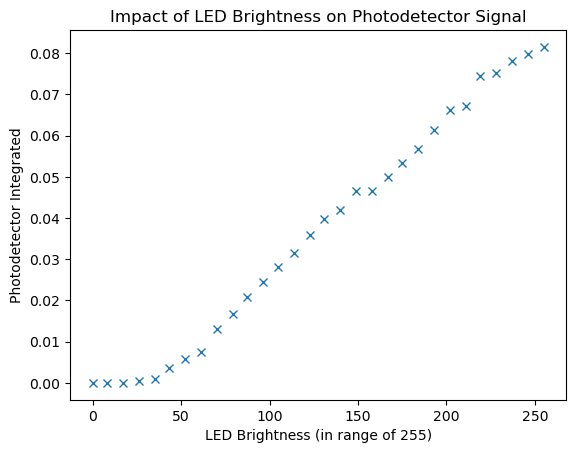

In [58]:
fig, ax = plt.subplots()
ax.plot(brigs, data, 'x')
ax.set_xlabel("LED Brightness (in range of 255)")
ax.set_ylabel("Photodetector Integrated")
ax.set_title("Impact of LED Brightness on Photodetector Signal")
plt.show()